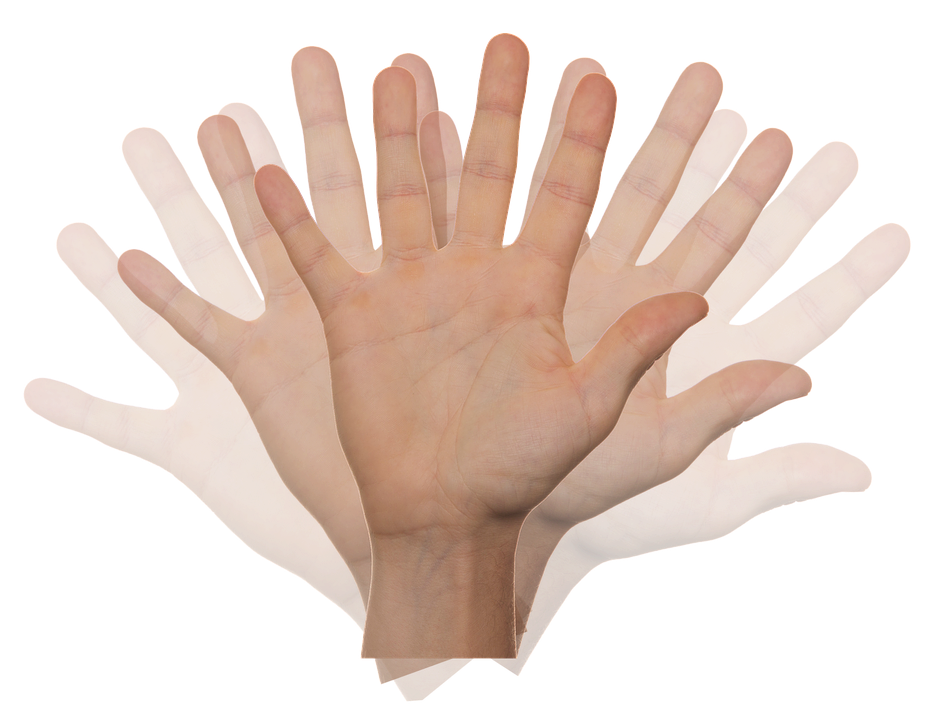

In [2]:
import numpy as np 
import pandas as pd 
import os
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import cv2

# Models
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

# Data Splitting
from sklearn.model_selection import train_test_split

# Scailing
from sklearn.preprocessing import StandardScaler

# Model evaluation
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score

In [3]:
def rename(df, char):
    for col in df.columns:
        col1 = char+col
        df = df.rename({col: col1}, axis=1)
    return df

In [4]:
def split(df) :
    half = int(len(df)/2)
    hd = df.head(half)
    tl = df.tail(len(df)-half)
    hd = hd.reset_index(drop=True)
    tl = tl.reset_index(drop=True)
    return hd, tl

In [5]:
def combine(df,numOfRows):
    
    for i in range(1, numOfRows+1):
        line = ["{}{}".format(ind,'_'+str(i)) for ind in df.columns]
        if i==1:
            lineTotal = line
            lineArr = [line]
        else:
            lineTotal = lineTotal + line
            lineArr.append(line)

    headlines = pd.DataFrame(columns = lineTotal)

    
    for i in range(0, len(df)-len(df)%numOfRows, numOfRows):
    
        for j in range(0, numOfRows):
            listj = df.loc[i+j]
            listj.index = lineArr[j]
            if j==0:
                arr = [listj]
            else:
                arr.append(listj)
    
        jumpRows = pd.concat(arr)
        headlines = headlines.append(jumpRows, ignore_index = True)
        
    return headlines

In [6]:
HandRight = pd.read_csv(r'\Users\97254\Desktop\Hand Positions\extraFiles\HandRight.csv')
for col in HandRight.columns:
    col1 = col.replace(" ", "_")
    HandRight = HandRight.rename({col: col1}, axis=1)
HandRight = HandRight.rename({'_#_hands': 'hands_num'}, axis=1) 
HandRight = HandRight[HandRight._Hand_Type == 'right']
HandRight = HandRight.dropna().reset_index(drop=True)

In [7]:
def encode(path, num):
    df = pd.read_csv(path).iloc[8:,:]
      
    for col in df.columns:
        col1 = col.replace(" ", "_")
        df = df.rename({col: col1}, axis=1)
        
    df = df.rename({'_#_hands': 'hands_num'}, axis=1)  
     
    if num != 2:
        df = df[df.hands_num == 2]
        df = df.sort_values(by=['_Hand_Type'])
        left, right =split(df)
    else:
        left = df[df.hands_num == 1].reset_index(drop=True)
        right = HandRight.iloc[8:,:]
        if len(left)>len(right):
            right = right.append(right.iloc[8:(len(left)-len(right)+8),:]).reset_index(drop=True)
        else:
            right = right.iloc[:len(left),:]
        
    left = rename(left, 'L')
    right = rename(right, 'R')
    df = pd.concat([left, right], axis=1)
    df = df.drop(['LTime', 'RTime', 'L_Frame_ID', 'R_Frame_ID', 'Lhands_num', 'Rhands_num'], axis=1)
    
    df = df[df.index % 5 == 0].reset_index(drop=True)
    df = combine(df,3)
    
    df['label']=num
    
    return df

In [8]:
def var_name(variable):
    fullName=''
    for name in globals():
        if eval(name) is variable:
            fullName += name
    return fullName

In [9]:
def organize(df):
    df = df.drop(columns=df.columns[(df == 'left').any()])
    df = df.drop(columns=df.columns[(df == 'right').any()])
    df = df.sample(frac=1).dropna().reset_index(drop=True)
    return df

In [10]:
def loadData(files):
    if "train" in var_name(files):
        path = r'\Users\97254\Desktop\Hand Positions\extraFiles\Training\\'
    elif "test" in var_name(files):
        path = r'\Users\97254\Desktop\Hand Positions\extraFiles\Validation\\'
    arr=[]
    for file in files:
        type = None
        if "Spontan" in file:
            type = 0
        elif "Sync" in file:
            type = 1
        elif "Alone" in file:
            type = 2
                    
        df = encode(path+file,type)
        arr.append(df)
        print('loaded - File: ', file, ' Type: ', type)
    df = pd.concat(arr).reset_index(drop=True)
    df = organize(df)
    return df

In [11]:
trainFiles = [
r'Evyatar Cohen\Evyatar636771052727603804Spontan.csv',
r'Evyatar Cohen\Evyatar636771053639929594Sync.csv',
r'Evyatar Cohen\Evyatar636771054555711409Alone.csv',


r'Nofar Social_Nuero\Nofar636759795182793299Spontan.csv',
r'Nofar Social_Nuero\Nofar636759797397919664Sync.csv',
r'Nofar Social_Nuero\Nofar636759796290435160Alone.csv',


r'Oriya Social_Nuero\Oriya636759804404113837Spontan.csv',
r'Oriya Social_Nuero\Oriya636759806131350399Sync.csv',
r'Oriya Social_Nuero\Oriya636759805268396661Alone.csv',


r'Orya Kalmanovitz\OryaB636771083605535985Spontan.csv',
r'Orya Kalmanovitz\OryaB636771084494502229Sync.csv',
r'Orya Kalmanovitz\OryaB636771082736601528Alone.csv',
    

r'Revital Marbel\Revital636770957038873193Spontan.csv',
r'Revital Marbel\Revital636770957894370062Sync.csv',
r'Revital Marbel\Revital636770955999435879Alone.csv',


r'Shahar Terner\Sachar636771045591258071Spontan.csv',
r'Shahar Terner\Sachar636771046527112972Sync.csv',
r'Shahar Terner\Sachar636771047408504303Alone.csv',


r'Shelly Social_Nuero\Shelly636759787508979097Spontan.csv',
r'Shelly Social_Nuero\Shelly636759789526313406Sync.csv',
r'Shelly Social_Nuero\Shelly636759788383205274Alone.csv',


r'Yael Hagai\Yael636771059544754823Spontan.csv',
r'Yael Hagai\Yael636771060699529085Sync.csv',
r'Yael Hagai\Yael636771061659067649Alone.csv',


r'Yoel Raz\Yoel636760921663075813Spontan.csv',
r'Yoel Raz\Yoel636760923490742912Sync.csv',
r'Yoel Raz\Yoel636760922573364655Alone.csv'
]

In [12]:
train = loadData(trainFiles)

loaded - File:  Evyatar Cohen\Evyatar636771052727603804Spontan.csv  Type:  0
loaded - File:  Evyatar Cohen\Evyatar636771053639929594Sync.csv  Type:  1
loaded - File:  Evyatar Cohen\Evyatar636771054555711409Alone.csv  Type:  2
loaded - File:  Nofar Social_Nuero\Nofar636759795182793299Spontan.csv  Type:  0
loaded - File:  Nofar Social_Nuero\Nofar636759797397919664Sync.csv  Type:  1
loaded - File:  Nofar Social_Nuero\Nofar636759796290435160Alone.csv  Type:  2
loaded - File:  Oriya Social_Nuero\Oriya636759804404113837Spontan.csv  Type:  0
loaded - File:  Oriya Social_Nuero\Oriya636759806131350399Sync.csv  Type:  1
loaded - File:  Oriya Social_Nuero\Oriya636759805268396661Alone.csv  Type:  2
loaded - File:  Orya Kalmanovitz\OryaB636771083605535985Spontan.csv  Type:  0
loaded - File:  Orya Kalmanovitz\OryaB636771084494502229Sync.csv  Type:  1
loaded - File:  Orya Kalmanovitz\OryaB636771082736601528Alone.csv  Type:  2
loaded - File:  Revital Marbel\Revital636770957038873193Spontan.csv  Type: 

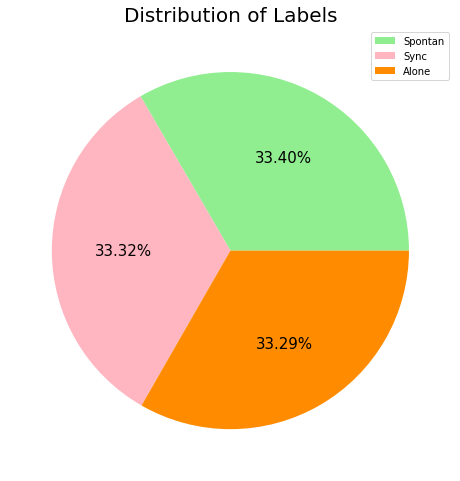

In [14]:
plt.subplots(figsize=(8, 9))
sorted_df = train.sort_values(by=['label'])
plt.pie(sorted_df['label'].value_counts(), colors = ['lightgreen', 'lightpink' , 'darkorange'], autopct = '%.2f%%' , textprops={"fontsize":15})
plt.title('Distribution of Labels' , fontdict = {'fontsize' : 20})
plt.legend(["Spontan" , "Sync" , "Alone"] , loc=1)

plt.show()

As we can see, each label has the same amount of instances which means that the data is well divided.

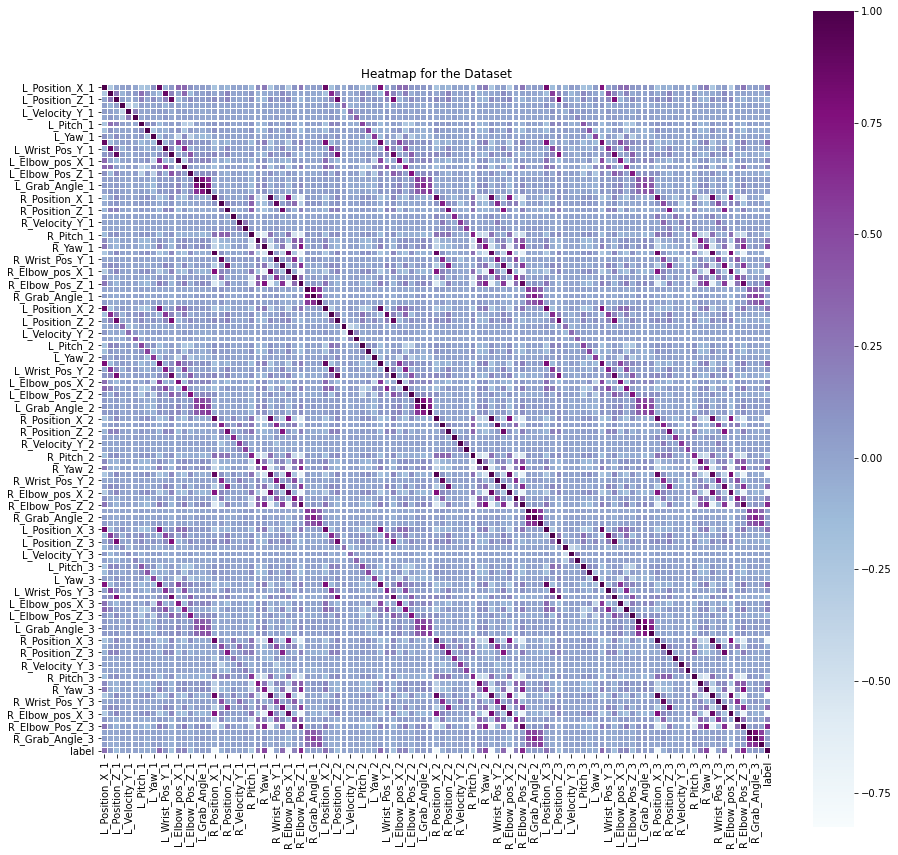

In [17]:
plt.subplots(figsize=(15, 15))
sns.heatmap(train.corr(), linewidths=0.2 , square=True, cmap = 'BuPu')
plt.title('Heatmap for the Dataset')
plt.show()

As can be understood there is a relationship between the next second and the current second,<br> so this is why the correlation graph between all the seconds looks like the heatmap above.

In [26]:
X = train.drop('label', axis=1)
y = train.label


# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

## PCA

During the semester we learned about the importance of dimensionality reduction.<br> We will now try to see this importance and then we will use dimensionality reduction.

There is an assuming that the significant changes are in specific columns.<br>
We'll try to see some of them and understand why using PCA is important.

In [20]:
L_Position_Y=train[['L_Position_Y_1','L_Position_Y_2','L_Position_Y_3','label']]

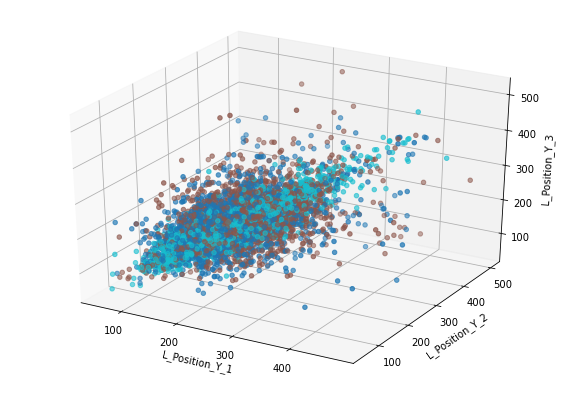

In [21]:
graph = plt.figure(figsize=(10,7)).gca(projection='3d')
graph.scatter(
    xs=L_Position_Y["L_Position_Y_1"], 
    ys=L_Position_Y["L_Position_Y_2"], 
    zs=L_Position_Y["L_Position_Y_3"], 
    c=L_Position_Y["label"], 
    cmap='tab10'
)
graph.set_xlabel('L_Position_Y_1')
graph.set_ylabel('L_Position_Y_2')
graph.set_zlabel('L_Position_Y_3')
plt.show()

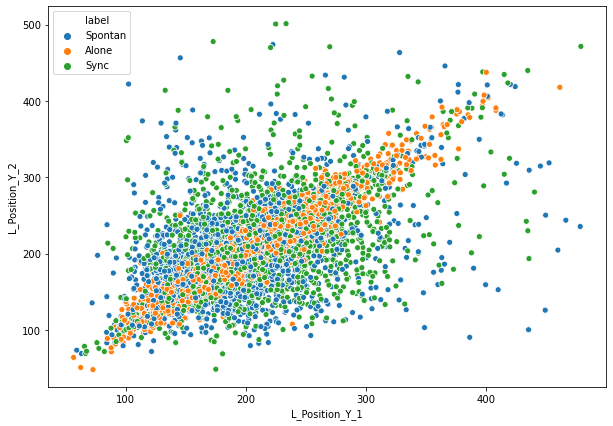

In [22]:
L_Position_Y = L_Position_Y.replace({'label': 0}, 'Spontan')
L_Position_Y = L_Position_Y.replace({'label': 1}, 'Sync')
L_Position_Y = L_Position_Y.replace({'label': 2}, 'Alone')

plt.figure(figsize=(10,7))

sns.scatterplot(
    x="L_Position_Y_1", y="L_Position_Y_2",
    hue = "label",
    data=L_Position_Y,
)

It can be seen that the external points are not from Alone label, but we still do not have a significant enough difference,<br> which means that this is an inappropriate and excessive dimension reduction.<br><br>
Let's try the same with L_Position_X.

In [23]:
L_Position_X=train[['L_Position_X_1','L_Position_X_2','L_Position_X_3','label']]

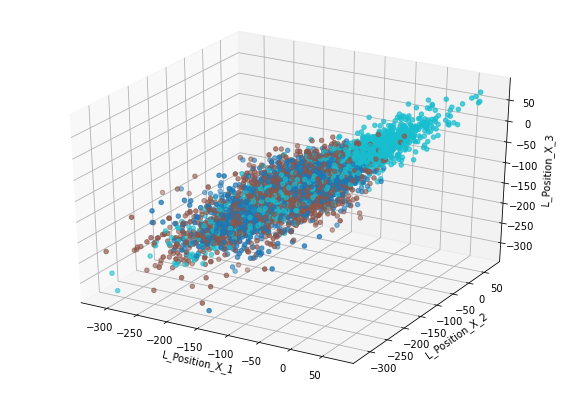

In [24]:
graph = plt.figure(figsize=(10,7)).gca(projection='3d')
graph.scatter(
    xs=L_Position_X["L_Position_X_1"], 
    ys=L_Position_X["L_Position_X_2"], 
    zs=L_Position_X["L_Position_X_3"], 
    c=L_Position_X["label"], 
    cmap='tab10'
)
graph.set_xlabel('L_Position_X_1')
graph.set_ylabel('L_Position_X_2')
graph.set_zlabel('L_Position_X_3')
plt.show()

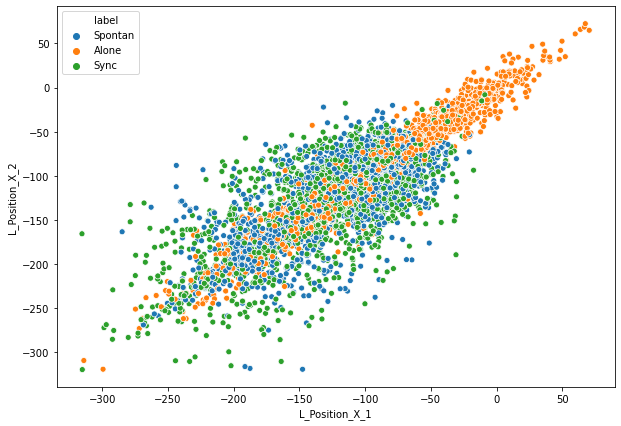

In [25]:
L_Position_X = L_Position_X.replace({'label': 0}, 'Spontan')
L_Position_X = L_Position_X.replace({'label': 1}, 'Sync')
L_Position_X = L_Position_X.replace({'label': 2}, 'Alone')

plt.figure(figsize=(10,7))

sns.scatterplot(
    x="L_Position_X_1", y="L_Position_X_2",
    hue = "label",
    data=L_Position_X,
)

Again we can see the difference between some of the Alone labels, but we still do not have a significant enough difference.<br>
That's explains us why we need to find the correct value for PCA.

## PCA Number of Components

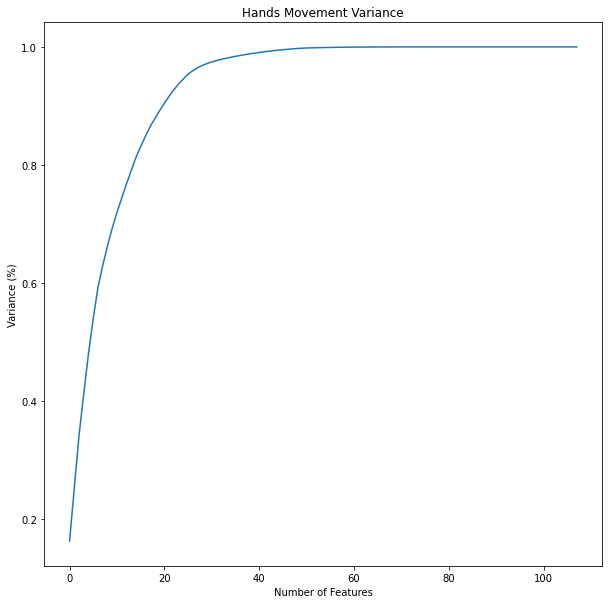

In [27]:
# fit the PCA with the training data
pca = PCA().fit(X_train)

# Plot the cumulative sum of eigenvalues
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Features')
plt.ylabel('Variance (%)') #for each component
plt.title('Hands Movement Variance')
plt.show()

We can understand that between 0 to 40 is the most change in accuracy.<br>
We'll look for the most lowest number of components that still gives us an acceptable accuracy, only between 0 to 20 because after that it's too much features for us.<br><br>
For this we'll create a new function using PIPELINE.

In [28]:
def PiplineScore(model , nComponents):
    pipeline_model = Pipeline([('scaler', StandardScaler()),
                              ('pca' , PCA(n_components=nComponents)),
                               ('model' , model())])

    pipeline_model.fit(X_train, y_train)
    print(model() , "Accuracy :  " , pipeline_model.score(X_test, y_test))
    return pipeline_model.score(X_test, y_test)

In [29]:
k_range = list(range(1,20))
scores_0_20 = []
for k in k_range:
    score = PiplineScore(DecisionTreeClassifier , k)
    scores_0_20.append(score)

DecisionTreeClassifier() Accuracy :   0.6465116279069767
DecisionTreeClassifier() Accuracy :   0.6558139534883721
DecisionTreeClassifier() Accuracy :   0.7229235880398671
DecisionTreeClassifier() Accuracy :   0.7627906976744186
DecisionTreeClassifier() Accuracy :   0.7800664451827243
DecisionTreeClassifier() Accuracy :   0.7980066445182724
DecisionTreeClassifier() Accuracy :   0.8272425249169435
DecisionTreeClassifier() Accuracy :   0.8617940199335549
DecisionTreeClassifier() Accuracy :   0.86843853820598
DecisionTreeClassifier() Accuracy :   0.879734219269103
DecisionTreeClassifier() Accuracy :   0.8903654485049833
DecisionTreeClassifier() Accuracy :   0.8916943521594685
DecisionTreeClassifier() Accuracy :   0.8916943521594685
DecisionTreeClassifier() Accuracy :   0.8943521594684385
DecisionTreeClassifier() Accuracy :   0.878405315614618
DecisionTreeClassifier() Accuracy :   0.891029900332226
DecisionTreeClassifier() Accuracy :   0.8857142857142857
DecisionTreeClassifier() Accuracy : 

Text(0.5, 1.0, 'Decision Tree Classifier')

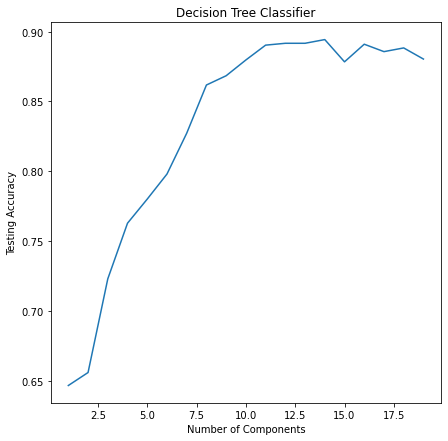

In [30]:
plt.figure(figsize=(7,7))
plt.plot(k_range, scores_0_20)
plt.xlabel('Number of Components')
plt.ylabel('Testing Accuracy')
plt.title('Decision Tree Classifier')

As we can see 14 has an acceptable accuracy and we will choose this number as our n_components number.

In [31]:
def PiplineScore14(model):
    pipeline_model = Pipeline([('scaler', StandardScaler()),
                              ('pca' , PCA(n_components=14)),
                               ('model' , model)])

    pipeline_model.fit(X_train, y_train)
    print(model , "Accuracy :  " , pipeline_model.score(X_test, y_test))
    return pipeline_model.score(X_test, y_test)

### KNN k Value

For KNN model we'll look for the best k value.

KNeighborsClassifier(n_neighbors=1) Accuracy :   0.9501661129568106
KNeighborsClassifier(n_neighbors=3) Accuracy :   0.9534883720930233
KNeighborsClassifier() Accuracy :   0.9568106312292359
KNeighborsClassifier(n_neighbors=7) Accuracy :   0.9548172757475083
KNeighborsClassifier(n_neighbors=9) Accuracy :   0.9534883720930233
KNeighborsClassifier(n_neighbors=11) Accuracy :   0.9521594684385382
KNeighborsClassifier(n_neighbors=13) Accuracy :   0.9475083056478405
KNeighborsClassifier(n_neighbors=15) Accuracy :   0.945514950166113
KNeighborsClassifier(n_neighbors=17) Accuracy :   0.9435215946843853
KNeighborsClassifier(n_neighbors=19) Accuracy :   0.945514950166113


Text(0, 0.5, 'Testing Accuracy')

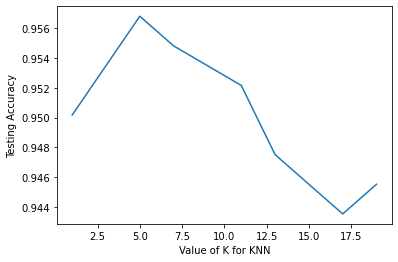

In [32]:
k_range = list(range(1, 20, 2))
scores = []
for k in k_range:
    score = PiplineScore14(KNeighborsClassifier(n_neighbors=k))
    scores.append(score)
     
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

We'll choose k=5 so we'll get the most high value of accuracy.

In [33]:
def PiplineScore14(model):
    pipeline_model = Pipeline([('scaler', StandardScaler()),
                               ('pca' , PCA(n_components=14)),
                               ('model' , model)])
    
    
    pipeline_model.fit(X_train, y_train)
    #model prediction
    y_pred = pipeline_model.predict(X_test)
    sns.set(font_scale=1.3)
    fig, ax = plt.subplots(figsize=(6, 6))
    ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cbar=True , cmap="YlGnBu" , fmt = '.0f')
    plt.xlabel("True Labels")
    plt.ylabel("Predicted Labels")
    # evaluating the model
    print("Training Accuracy :", pipeline_model.score(X_train, y_train))
    print("Testing Accuracy :" , metrics.accuracy_score(y_test, y_pred))
    print()
    print(classification_report(y_test, y_pred))
    return pipeline_model.score(X_test , y_test)

## Modelling

In [34]:
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier(strategy="most_frequent")
dummy.fit(X, y)
dummy.score(X, y)

0.33395373570858816

We want to manage more than the dummy classifier score which is 33.3%.

Decision Tree Classifier:

Training Accuracy : 0.9953465181984378
Testing Accuracy : 0.8837209302325582

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       508
           1       0.83      0.84      0.83       503
           2       0.99      0.99      0.99       494

    accuracy                           0.88      1505
   macro avg       0.88      0.88      0.88      1505
weighted avg       0.88      0.88      0.88      1505



0.8837209302325582

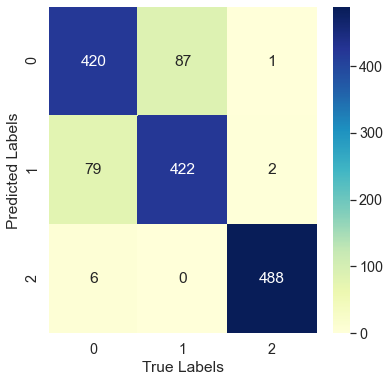

In [36]:
PiplineScore14(DecisionTreeClassifier())

Logistic Regression:

Training Accuracy : 0.8869868705334885
Testing Accuracy : 0.8877076411960133

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       508
           1       0.85      0.81      0.83       503
           2       0.99      0.99      0.99       494

    accuracy                           0.89      1505
   macro avg       0.89      0.89      0.89      1505
weighted avg       0.89      0.89      0.89      1505



0.8877076411960133

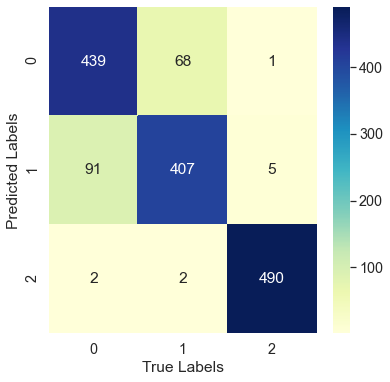

In [37]:
PiplineScore14(LogisticRegression())

KNN Classifier:

Training Accuracy : 0.9730762838623899
Testing Accuracy : 0.9541528239202658

              precision    recall  f1-score   support

           0       0.92      0.95      0.93       508
           1       0.95      0.92      0.93       503
           2       1.00      0.99      1.00       494

    accuracy                           0.95      1505
   macro avg       0.96      0.95      0.95      1505
weighted avg       0.95      0.95      0.95      1505



0.9541528239202658

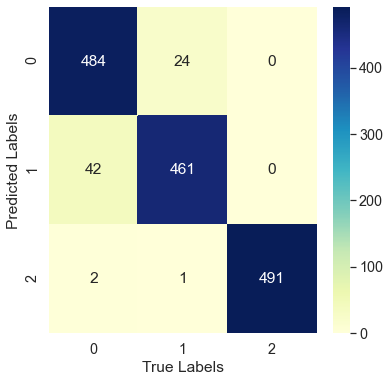

In [38]:
PiplineScore14(KNeighborsClassifier())

AdaBoost Classifier:

Training Accuracy : 0.7497091573874024
Testing Accuracy : 0.7269102990033223

              precision    recall  f1-score   support

           0       0.60      0.59      0.59       508
           1       0.64      0.74      0.69       503
           2       1.00      0.86      0.92       494

    accuracy                           0.73      1505
   macro avg       0.75      0.73      0.73      1505
weighted avg       0.74      0.73      0.73      1505



0.7269102990033223

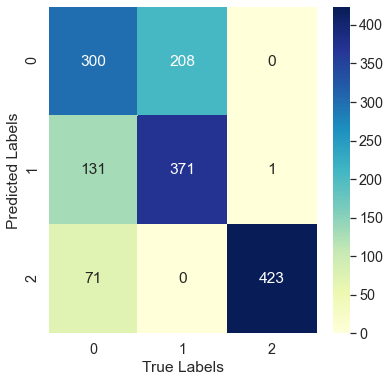

In [39]:
PiplineScore14(AdaBoostClassifier())

XGB Classifier:

[18:56:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training Accuracy : 1.0
Testing Accuracy : 0.9441860465116279

              precision    recall  f1-score   support

           0       0.92      0.92      0.92       508
           1       0.92      0.92      0.92       503
           2       0.99      0.99      0.99       494

    accuracy                           0.94      1505
   macro avg       0.94      0.94      0.94      1505
weighted avg       0.94      0.94      0.94      1505



0.9441860465116279

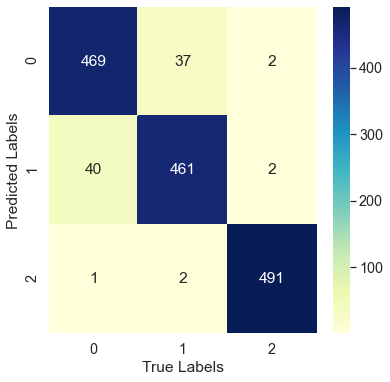

In [41]:
PiplineScore14(XGBClassifier())

Gradient Boosting Classifier:

Training Accuracy : 0.9591158384577032
Testing Accuracy : 0.9275747508305647

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       508
           1       0.91      0.87      0.89       503
           2       0.99      0.99      0.99       494

    accuracy                           0.93      1505
   macro avg       0.93      0.93      0.93      1505
weighted avg       0.93      0.93      0.93      1505



0.9275747508305647

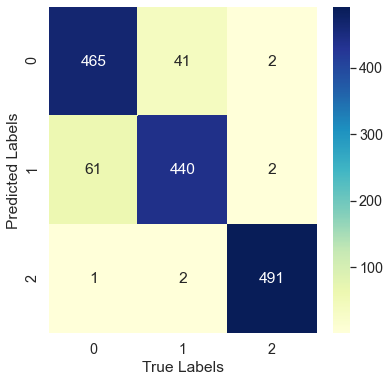

In [43]:
PiplineScore14(GradientBoostingClassifier())

Random Forest Classifier:

Training Accuracy : 1.0
Testing Accuracy : 0.9428571428571428

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       508
           1       0.94      0.90      0.92       503
           2       0.99      0.99      0.99       494

    accuracy                           0.94      1505
   macro avg       0.94      0.94      0.94      1505
weighted avg       0.94      0.94      0.94      1505



0.9428571428571428

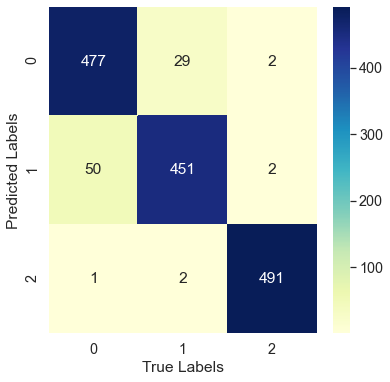

In [44]:
PiplineScore14(RandomForestClassifier())

In [46]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
X_scaled = StandardScaler().fit_transform(X_train)
pca = PCA(n_components=14)
X_train_reduced = pca.fit_transform(X_scaled)
Kfolds = StratifiedKFold(n_splits=5,shuffle=True, random_state=7)

model_params = {
    'random_forest':{
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [100, 150],
            'max_depth': [10,20,50,80,100]
        }
    },
    
    'logistic_regression':{
        'model': LogisticRegression(multi_class= 'auto'),
        'params': {
            'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
            'C': [0.1, 0.5, 1.0]
        }
    },
    
    'xgb':{
        'model': XGBClassifier(eval_metric='mlogloss'),
        'params':{
            'n_estimators': [100, 150],
            'learning_rate': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]            
        }
    },
    
    'knn':{
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [5,7,10, 15],
            'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
        }
    },
    
    'gradient_boosting':{
        'model': GradientBoostingClassifier(),
        'params': {
            'n_estimators': [100, 150],
            'max_depth': [10,20,50,80,100]
        }
    }
}
scores = []

for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv = Kfolds, return_train_score= False)
    clf.fit(X_train_reduced, y_train)
    scores.append({
        'model': model_name,
        'best score': clf.best_score_,
        'best params': clf.best_params_
    })

score_df = pd.DataFrame(scores)
score_df

,model,best score,best params
0,random_forest,0.941996,"{'max_depth': 100, 'n_estimators': 100}"
1,logistic_regression,0.885491,"{'C': 1.0, 'solver': 'sag'}"
2,xgb,0.951138,"{'learning_rate': 0.2, 'n_estimators': 150}"
3,knn,0.950141,"{'algorithm': 'auto', 'n_neighbors': 7}"
4,gradient_boosting,0.943161,"{'max_depth': 10, 'n_estimators': 150}"


In [47]:
current_scores=[]
current_scores.append({
        'model': 'random_forest',
        'score': 0.9428571428571428

})
current_scores.append({
        'model': 'logistic_regression',
        'score': 0.8877076411960133

})
current_scores.append({
        'model': 'xgb',
        'score': 0.9441860465116279

})
current_scores.append({
        'model': 'knn',
        'score': 0.9541528239202658

})
current_scores.append({
        'model': 'gradient_boosting',
        'score': 0.9275747508305647

})
current_scores_df = pd.DataFrame(current_scores)
current_scores_df

,model,score
0,random_forest,0.942857
1,logistic_regression,0.887708
2,xgb,0.944186
3,knn,0.954153
4,gradient_boosting,0.927575


The score increased in only two of the models, so we will change the parameters in them so that we get the highest accuracy.

XGB Classifier:

Training Accuracy : 0.9998338042213728
Testing Accuracy : 0.9488372093023256

              precision    recall  f1-score   support

           0       0.92      0.93      0.93       508
           1       0.93      0.92      0.93       503
           2       0.99      0.99      0.99       494

    accuracy                           0.95      1505
   macro avg       0.95      0.95      0.95      1505
weighted avg       0.95      0.95      0.95      1505



0.9488372093023256

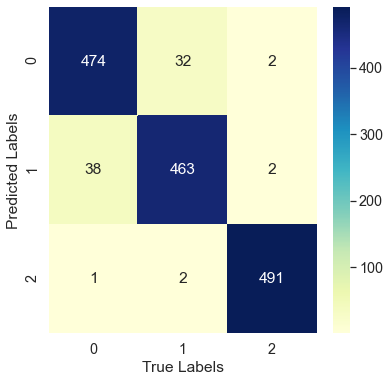

In [50]:
PiplineScore14(XGBClassifier(eval_metric='mlogloss', learning_rate=0.2, n_estimators=150))

Gradient Boosting Classifier:

Training Accuracy : 1.0
Testing Accuracy : 0.9475083056478405

              precision    recall  f1-score   support

           0       0.92      0.93      0.93       508
           1       0.93      0.92      0.92       503
           2       0.99      0.99      0.99       494

    accuracy                           0.95      1505
   macro avg       0.95      0.95      0.95      1505
weighted avg       0.95      0.95      0.95      1505



0.9475083056478405

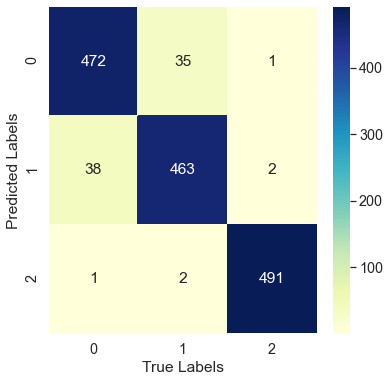

In [49]:
PiplineScore14(GradientBoostingClassifier(max_depth=10, n_estimators=150))

Bagging Classifier: